In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
plt.rcParams.update({"font.size": 12})

# Árvores de decisão

Uma árvore de decisão é uma árvore binária onde os vários nós não-terminais correspondem a decisões acerca da amostra sendo analisada, e as folhas correspondem aos valores de predição. Por exemplo, considere o famoso dataset "Iris" e o problema de classificar as flores em "virginica", "versicolor" e "setosa".

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = pd.Series(iris["target"], name="class")

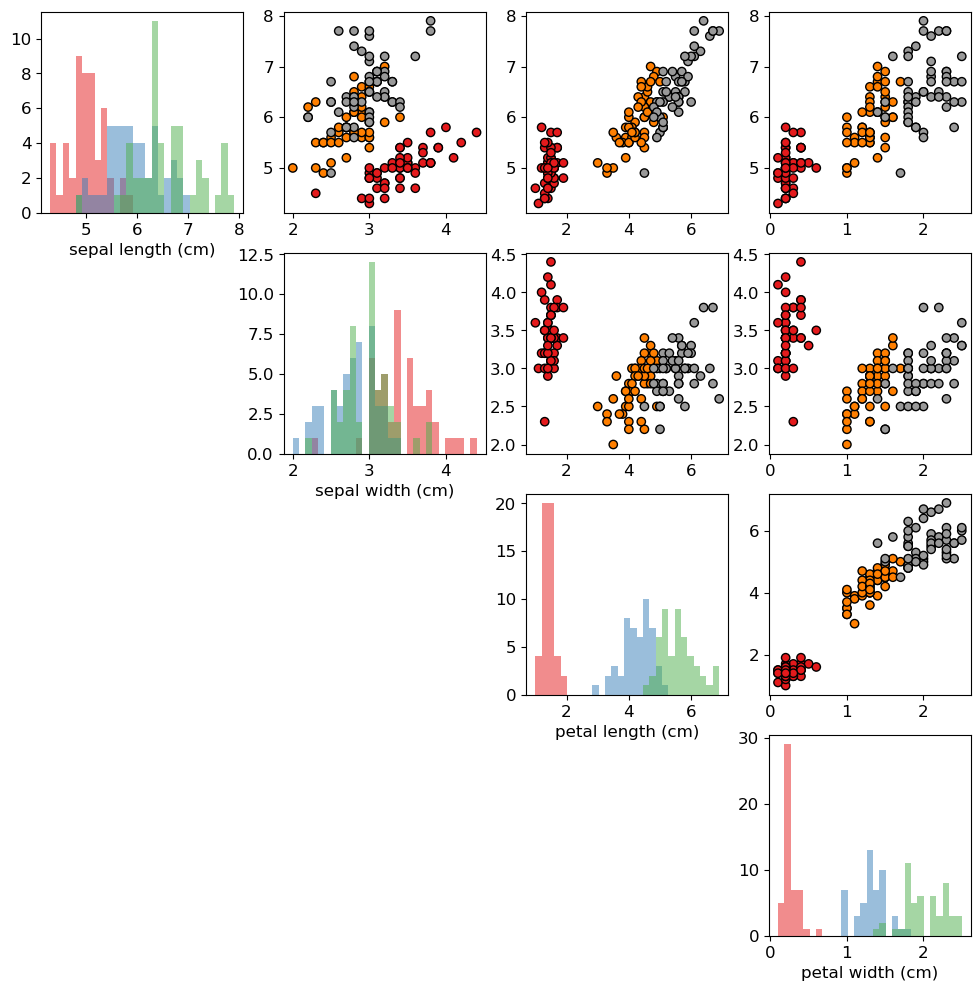

In [3]:
def plot_hist(X, y):
    bins = np.linspace(X.min(), X.max(), 30)
    for c in y.value_counts().index:
        plt.hist(
            X[y == c].values,
            bins=bins,
            label=str(c),
            alpha=0.5,
            color=plt.cm.Set1.colors[c],
        )


def plot_scatter(X, y):
    cols = X.columns
    n = len(cols)
    for i in range(n):
        plt.subplot(n, n, i * n + i + 1)
        plot_hist(X[cols[i]], y)
        plt.xlabel(cols[i])

        for j in range(i + 1, n):
            plt.subplot(n, n, i * n + j + 1)
            plt.scatter(
                X[cols[j]],
                X[cols[i]],
                c=y,
                cmap=plt.cm.Set1,
                edgecolor="k",
            )


plt.figure(figsize=(12, 12))
plot_scatter(X, y)
plt.show()

 Para simplificar nossa explanação, vamos nos limitar ao uso de apenas duas características: sepal width e petal width

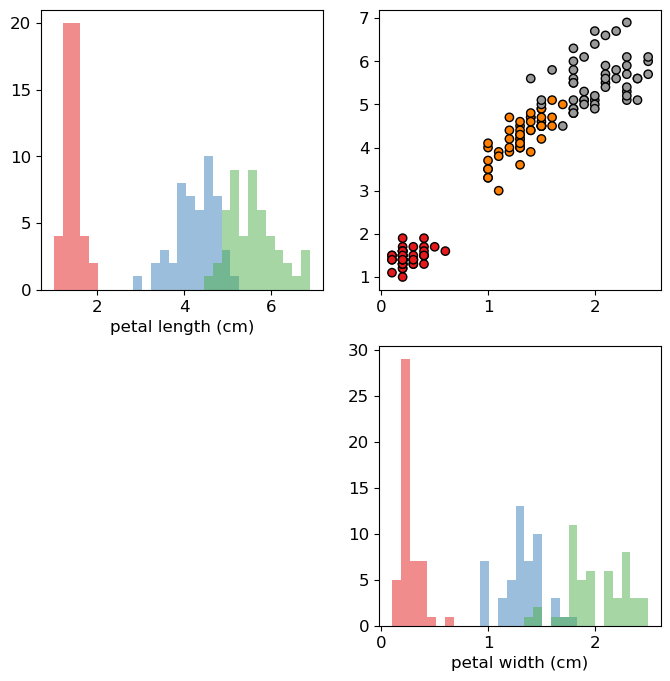

In [4]:
X_simple = X[["petal length (cm)", "petal width (cm)"]]
plt.figure(figsize=(8, 8))
plot_scatter(X_simple, y)
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_simple, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

In [7]:
!dot -Tpng iris_tree.dot -o iris_tree.png

A imagem abaixo foi gerada usando o comando `dot -Tpng iris_tree.dot -o iris_tree.png`. 

<img src='iris_tree.png'/>

Observe que em cada nó o coeficiente Gini diminui em relação ao nó do nível precedente.

**Atividade:** Estude o material do capítulo 6 e responda:

- O que é CART?
- O que são modelos paramétricos e não-paramétricos?
- Qual o principal hiperparâmetro de regularização de uma árvore de decisão? Porque temos overfitting se este parâmetro não for restrito?
- CART consegue fazer tanto classificação (multiclasse inclusive!) como regressão! O que muda no CART entre classificação e regressão?
- Explique porque não é necessário re-escalar as *features* quando usamos uma árvore de decisão.
- (Ex. 5 Géron): Se para treinar um modelo de árvore de decisão com 1 milhão de amostras levamos 1 hora, quanto tempo a mais levaríamos para treinar um modelo com 10 milhões de amostras?

**R:**

**Atividade:** Exercício 7 do livro texto (Géron)

**Desafio**: Exercício 8 do livro texto (Géron)